In [16]:
import importlib
import blizzcolors
import rio
importlib.reload(blizzcolors)
importlib.reload(rio)

import time

In [483]:
colors = blizzcolors.BlizzColors()

In [486]:
colors.class_hexcolor

{'death knight': '#C41F3B',
 'demon hunter': '#A330C9',
 'druid': '#FF7D0A',
 'hunter': '#A9D271',
 'mage': '#40C7EB',
 'monk': '#00FF96',
 'paladin': '#F58CBA',
 'priest': '#FFFFFF',
 'rogue': '#FFF569',
 'shaman': '#0070DE',
 'warlock': '#8787ED',
 'warrior': '#C79C6E'}

In [2]:
import requests
import pandas as pd
import time
import pickle
from collections import OrderedDict
import matplotlib.pyplot as plt

import numpy as np


pd.options.display.max_columns = 100

In [50]:
a = [('a', 'b'), ('a', 'b')]

pd.DataFrame(a)

,0,1
0,a,b
1,a,b


In [174]:
legion_data_raw = pickle.load(
    open('data/legion_top100_runs_every_region_raw_resp.pkl', 'rb')
    )

bfa_data_raw = pickle.load(
    open('data/bfa_top100_runs_every_region_raw_resp.pkl', 'rb')
    )

In [185]:
importlib.reload(rio)
t0 = time.time()
def parse_data(raw_response_list):
    data = []
    for response in raw_response_list:
        parser = rio.RioResponseParser(response)
        runs = parser.unroll()
        [data.append(run) for run in runs]
    return pd.DataFrame(data)

legion_df = parse_data(legion_data_raw)
bfa_df = parse_data(bfa_data_raw)
print(time.time() - t0)

<Response [502]>
<Response [502]>
<Response [502]>
<Response [502]>
<Response [502]>
<Response [502]>
10.579830169677734


In [188]:
df = pd.concat([legion_df, bfa_df])
df.head()

,id,rank,season,dungeon,region,dps_mage,healer_paladin,dps_druid_balance,tank_druid,dps_death_knight,dps_hunter_marksmanship,tank_monk,healer_druid,dps_demon_hunter,dps_rogue,dps_warlock,healer_priest_discipline,tank_warrior,dps_paladin,tank_paladin,dps_warrior,dps_hunter_beast_mastery,dps_shaman_elemental,dps_priest,dps_shaman_restoration,dps_monk,healer_shaman,tank_demon_hunter,dps_shaman_enhancement,healer_monk,dps_druid_feral,tank_death_knight,healer_priest_shadow,dps_hunter_survival,dps_druid_guardian,healer_priest_holy,dps_druid_restoration,healer_rogue,tank_warlock,tank_hunter,healer_death_knight
0,5079073,1,season-7.2.0,BRH,us,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5222177,2,season-7.2.0,BRH,us,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5178008,3,season-7.2.0,BRH,us,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5185105,4,season-7.2.0,BRH,us,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5186312,5,season-7.2.0,BRH,us,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Get class count vs seasons

In [301]:
# main seasons
seasons = [
    'season-7.2.0', 'season-7.2.5', 'season-7.3.0', 'season-7.3.2',
    'season-bfa-1', 'season-bfa-2', 'season-bfa-3', 'season-bfa-4'
    ]

# count the total number of chracter specs across the main seasons
gdf = df[df['season'].isin(seasons)].groupby('season').sum().drop(['id', 'rank'], axis=1)

gdf.T.sort_index(ascending=False)

season,season-7.2.0,season-7.2.5,season-7.3.0,season-7.3.2,season-bfa-1,season-bfa-2,season-bfa-3,season-bfa-4
tank_warrior,387.0,259.0,121.0,48.0,279.0,2906.0,1141.0,2364.0
tank_warlock,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tank_paladin,769.0,473.0,805.0,342.0,144.0,185.0,140.0,96.0
tank_monk,395.0,289.0,273.0,24.0,371.0,36.0,1770.0,599.0
tank_hunter,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
tank_druid,917.0,406.0,223.0,9.0,38.0,11.0,34.0,124.0
tank_demon_hunter,630.0,945.0,1043.0,1147.0,290.0,13.0,90.0,501.0
tank_death_knight,733.0,1458.0,1664.0,2744.0,2098.0,205.0,81.0,151.0
healer_shaman,469.0,459.0,223.0,38.0,13.0,15.0,14.0,56.0
healer_rogue,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Deal with errors
There is a small number of erros, with specs assigned to roles that they cannot perform. For example, **dps_druid_resto** shows up in the dataframe. Restoration druids can not fill dps roles. This could be a result of edge cases (double healer run), where one of the healers, a resto druid in this case, is assigned to a dps slot by the Rio parser.<br>

Crippled group comps like double healer, however, are very unlikely to be timing region top-100 keys. Additionally, these errors primarily occur in seasons 1 and 2 of Legion (early in Rio's history) and plague hybrid specs (druids, and in additon priests) who are liable to switch specs frequently. This leads me to belive that something was wrong on Rio's end or with Blizzard's API in the early days when it came to parsing roster data.<br>

To deal with these errors, we can remove misclassified samples from the data. That would skew the ratios for other classes, especially for categories where priests and druids are involved. So, I'd rather go through each mistake by hand, and distribute misclassified samples proportionally among valid specs.<br>

For example, there are 10 dps mistakenly marked as **resto druid** in a season. Distribute these 10 among **balance druid** and **feral druid** according to the ratio between the two valid specs. So, if 80% of dps druids are balace and 20% feral, add 8 to balance category, and 2 to feral. Then set **dps_druid_resto** cell to 0, and remove from set.

PS<br>
I can also design a more intricate parser on my end to catch errors early, but the time cost of doing it is too high compared to just fixing it by hand now (~10 minutes).


In [302]:
# invalid data
invalid_columns = ['tank_hunter',
                   'healer_rogue',
                   'healer_priest_shadow',
                   'healer_death_knight',
                   'dps_shaman_restoration',
                   'dps_druid_restoration',
                   'dps_druid_guardian']

gdf[invalid_columns]

,tank_hunter,healer_rogue,healer_priest_shadow,healer_death_knight,dps_shaman_restoration,dps_druid_restoration,dps_druid_guardian
season,,,,,,,
season-7.2.0,2.0,12.0,143.0,1.0,104.0,40.0,54.0
season-7.2.5,3.0,0.0,95.0,0.0,27.0,149.0,74.0
season-7.3.0,0.0,0.0,102.0,0.0,29.0,160.0,59.0
season-7.3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
season-bfa-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
season-bfa-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
season-bfa-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
season-bfa-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [299]:
def distribute(df, source_spec, target_specs):
    if len(target_specs) == 1:
        df[target_specs[0]] += df[source_spec]
    else:
        sum_targets = df[target_specs].sum(axis=1)
        for target_spec in target_specs:
            pct_spec = df[target_spec]/sum_targets
            df[target_spec] += df[source_spec] * pct_spec 
    df[source_spec] = 0

In [315]:
distribute(gdf, 'healer_rogue', ['dps_rogue'])
distribute(gdf, 'tank_hunter', ['dps_hunter_survival',
                                'dps_hunter_marksmanship',
                                'dps_hunter_beast_mastery'
                               ])
distribute(gdf, 'healer_priest_shadow', ['healer_priest_holy',
                                         'healer_priest_discipline'])
distribute(gdf, 'dps_shaman_restoration', ['dps_shaman_elemental',
                                           'dps_shaman_enhancement'])
distribute(gdf, 'dps_druid_restoration', ['dps_druid_feral',
                                          'dps_druid_balance'])
distribute(gdf, 'dps_druid_guardian', ['dps_druid_feral',
                                       'dps_druid_balance'])
gdf['healer_death_knight'] = 0 # it's just 1 sample

gdf = gdf.round()

#### Plot Healer data

In [141]:
healers = ['healer_%s' % s for s in ['druid', 'paladin', 'shaman', 'monk',
                                     'priest_holy', 'priest_discipline']]
print(healers)

['healer_druid', 'healer_paladin', 'healer_shaman', 'healer_monk', 'healer_priest_holy', 'healer_priest_discipline']


In [334]:
hlr = gdf[healers].div(gdf[healers].sum(axis=1), axis=0)
hlr

,healer_druid,healer_paladin,healer_shaman,healer_monk,healer_priest_holy,healer_priest_discipline
season,,,,,,
season-7.2.0,0.448456,0.267399,0.122711,0.012821,0.079016,0.069597
season-7.2.5,0.351852,0.338289,0.119718,0.022170,0.093114,0.074857
season-7.3.0,0.354651,0.448401,0.054021,0.007994,0.041909,0.093023
season-7.3.2,0.271905,0.682143,0.009048,0.002619,0.028095,0.006190
season-bfa-1,0.409464,0.068139,0.004101,0.234069,0.003785,0.280442
season-bfa-2,0.886472,0.063170,0.004470,0.020262,0.000000,0.025626
season-bfa-3,0.828519,0.137062,0.004302,0.007683,0.000615,0.021819
season-bfa-4,0.619097,0.268980,0.014610,0.055570,0.001304,0.040438


In [410]:
gdf[['healer_druid', 'healer_paladin']].sum().sum() / gdf[healers].sum().sum()

0.8092374227117614

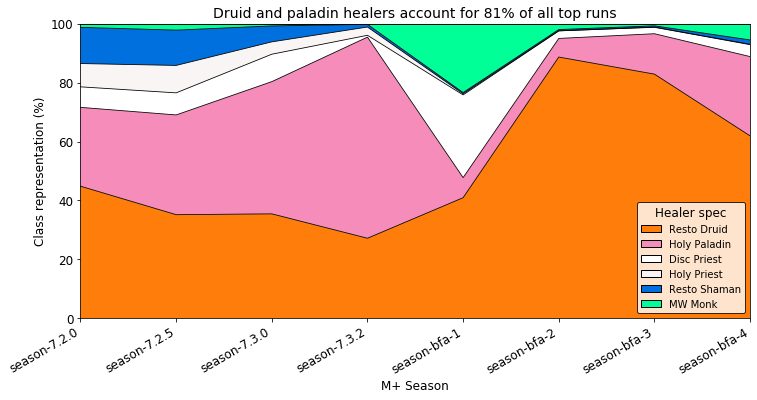

In [535]:
fig = plt.gcf()
fig.set_size_inches(12, 6.5)
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)

plt.stackplot(list(range(len(hlr))),
              hlr['healer_druid'],
              hlr['healer_paladin'],
              hlr['healer_priest_discipline'],
              hlr['healer_priest_holy'],
              hlr['healer_shaman'],
              hlr['healer_monk'],
              colors = ['#FF7D0A', '#F58CBA', '#ffffff',
                        '#faf5f5', '#0070DE', '#00FF96'])
leg = plt.legend(['Resto Druid', 'Holy Paladin', 'Disc Priest',
                  'Holy Priest', 'Resto Shaman', 'MW Monk'], title='Healer spec',
                frameon=True, edgecolor='black', ncol=1, loc='lower right', fontsize=10)
            #bbox_to_anchor=(1.2, 1))
for lh in leg.legendHandles:
    lh.set_edgecolor('black')

dfx = np.zeros(8)
for i in ['healer_druid', 'healer_paladin', 'healer_priest_discipline', 'healer_priest_holy', 'healer_shaman', 'healer_monk']:
    dfx = dfx + hlr[i].to_numpy()
    plt.plot(list(range(len(hlr))),
             dfx, color='black', lw=0.8)

plt.xticks(list(range(len(hlr))),list(hlr.index), rotation=30,
           horizontalalignment='right')
plt.yticks([0.2*i for i in range(6)], [int(100*0.2*i) for i in range(6)])

plt.title('Druid and paladin healers account for 81% of all top runs')
plt.ylabel('Class representation (%)')
plt.xlabel('M+ Season')
plt.xlim([0,len(hlr)-1])
plt.ylim([0,1])

plt.gcf().subplots_adjust(bottom=0.25)

plt.savefig('visualization/healers_new.jpg', dpi=300)

#### Plot tank data

In [412]:
# isolate tanks into their own DF, and convert counts into %
tanks = ['tank_' + i for i in ['druid', 'paladin', 'death_knight',
                               'demon_hunter', 'monk', 'warrior']]

tnk = gdf[tanks].div(gdf[tanks].sum(axis=1), axis=0)
tnk

,tank_druid,tank_paladin,tank_death_knight,tank_demon_hunter,tank_monk,tank_warrior
season,,,,,,
season-7.2.0,0.239363,0.200731,0.191334,0.164448,0.103106,0.101018
season-7.2.5,0.106005,0.123499,0.380679,0.246736,0.075457,0.067624
season-7.3.0,0.054008,0.194962,0.403003,0.252604,0.066118,0.029305
season-7.3.2,0.002086,0.079277,0.636069,0.265879,0.005563,0.011127
season-bfa-1,0.011801,0.044720,0.651553,0.090062,0.115217,0.086646
season-bfa-2,0.003278,0.055125,0.061085,0.003874,0.010727,0.865912
season-bfa-3,0.010442,0.042998,0.024877,0.027641,0.543612,0.350430
season-bfa-4,0.032334,0.025033,0.039374,0.130639,0.156193,0.616428


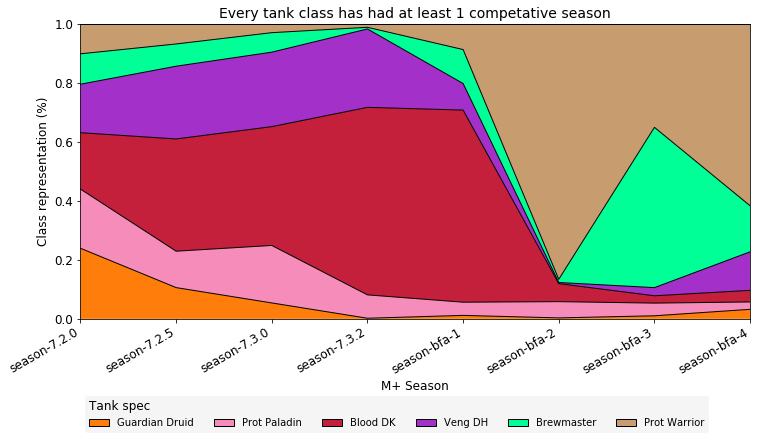

In [536]:
fig = plt.gcf()
fig.set_size_inches(12, 6.5)
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)

plt.stackplot(list(range(len(tnk))),
              tnk['tank_druid'],
              tnk['tank_paladin'],
              tnk['tank_death_knight'],
              tnk['tank_demon_hunter'],
              tnk['tank_monk'],
              tnk['tank_warrior'],
              colors = ['#FF7D0A', '#F58CBA', '#C41F3B',
                        '#A330C9', '#00FF96', '#C79C6E'])

leg = plt.legend(['Guardian Druid', 'Prot Paladin', 'Blood DK',
            'Veng DH', 'Brewmaster', 'Prot Warrior'],
           fontsize=10, loc='lower left', title='Tank spec',
           ncol=6, bbox_to_anchor=(0,-0.4), frameon=True, facecolor='grey', framealpha=0.08)
leg._legend_box.align = 'left'

# edge legend patches (currently not visible)
for lh in leg.legendHandles:
    lh.set_edgecolor('black')

dfx = np.zeros(8)
for i in tanks:
    dfx = dfx + tnk[i].to_numpy()
    plt.plot(list(range(len(tnk))),
             dfx, color='black', lw=1)

plt.xticks(list(range(len(tnk))),list(tnk.index), rotation=30,
           horizontalalignment='right')

plt.title('Every tank class has had at least 1 competative season')
plt.ylabel('Class representation (%)')
plt.xlabel('M+ Season')
plt.xlim([0,len(tnk)-1])
plt.ylim([0,1])


plt.gcf().subplots_adjust(bottom=0.25)

plt.savefig('visualization/tanks_new.jpg', dpi=300)

#### Plot melee dps data

In [583]:
dps_melee= [
    'dps_demon_hunter',
    'dps_rogue',
    'dps_paladin',
    'dps_warrior',
    'dps_death_knight',
    'dps_monk',
    'dps_hunter_survival',
    'dps_druid_feral',
    'dps_shaman_enhancement',
    ]
dpsm = gdf[dps_melee].div(gdf[dps_melee].sum(axis=1), axis=0)
dpsm

,dps_demon_hunter,dps_rogue,dps_paladin,dps_warrior,dps_death_knight,dps_monk,dps_hunter_survival,dps_druid_feral,dps_shaman_enhancement
season,,,,,,,,,
season-7.2.0,0.274403,0.190239,0.175705,0.138395,0.129718,0.038612,0.020390,0.016703,0.015835
season-7.2.5,0.178420,0.321075,0.091332,0.274197,0.075571,0.019600,0.005658,0.015963,0.018185
season-7.3.0,0.114416,0.430194,0.065469,0.258984,0.054316,0.015903,0.004750,0.046675,0.009294
season-7.3.2,0.141611,0.215657,0.015208,0.048866,0.068312,0.508851,0.000000,0.001496,0.000000
season-bfa-1,0.411159,0.500429,0.013219,0.018884,0.009614,0.045665,0.000687,0.000343,0.000000
season-bfa-2,0.199028,0.644852,0.031035,0.008231,0.017676,0.098232,0.000000,0.000540,0.000405
season-bfa-3,0.326639,0.581409,0.003586,0.035576,0.023526,0.027256,0.000000,0.000143,0.001865
season-bfa-4,0.385941,0.464712,0.012503,0.067658,0.035982,0.013059,0.000000,0.007919,0.012226


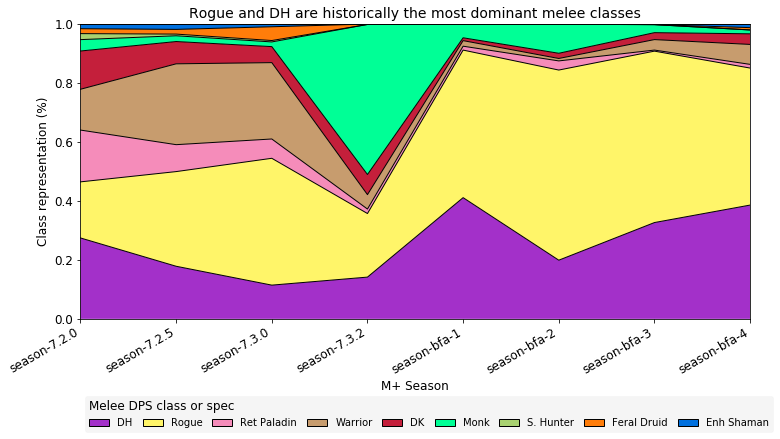

In [586]:
fig = plt.gcf()
fig.set_size_inches(12, 6.5)
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)

clr = blizzcolors.BlizzColors()
plt.stackplot(list(range(len(dpsm))),
              dpsm['dps_demon_hunter'],
              dpsm['dps_rogue'],
              dpsm['dps_paladin'],
              dpsm['dps_warrior'],
              dpsm['dps_death_knight'],
              dpsm['dps_monk'],
              dpsm['dps_hunter_survival'],
              dpsm['dps_druid_feral'],
              dpsm['dps_shaman_enhancement'],
              colors = [clr.get_color('demon hunter'),
                        clr.get_color('rogue'),
                        clr.get_color('paladin'),
                        clr.get_color('warrior'),
                        clr.get_color('death knight'),
                        clr.get_color('monk'),
                        clr.get_color('hunter'),
                        clr.get_color('druid'),
                        clr.get_color('shaman')]
             )

leg = plt.legend(['DH', 'Rogue', 'Ret Paladin', 'Warrior',
    'DK', 'Monk', 'S. Hunter', 'Feral Druid', 'Enh Shaman'],
    fontsize=10, loc='lower left', title='Melee DPS class or spec',
     ncol=9, bbox_to_anchor=(0,-0.4), frameon=True, facecolor='grey',
    framealpha=0.08,
    columnspacing=1)

leg._legend_box.align = 'left'

# edge legend patches (currently not visible)
for lh in leg.legendHandles:
    lh.set_edgecolor('black')

dfx = np.zeros(8)
for i in dps_melee:
    dfx = dfx + dpsm[i].to_numpy()
    plt.plot(list(range(len(dpsm))),
              dfx, color='black', lw=1)

plt.xticks(list(range(len(dpsm))),list(dpsm.index), rotation=30,
           horizontalalignment='right')

plt.title('Legion melee meta was somewhat more diverse than BFA')
plt.ylabel('Class representation (%)')
plt.xlabel('M+ Season')
plt.xlim([0,len(tnk)-1])
plt.ylim([0,1])


plt.gcf().subplots_adjust(bottom=0.25)

plt.savefig('visualization/melee_dps_new.jpg', dpi=300)

In [337]:
dpsr = gdf[dps_range].div(gdf[dps_range].sum(axis=1), axis=0)
dpsr

,dps_druid_balance,dps_hunter_beast_mastery,dps_hunter_marksmanship,dps_mage,dps_priest,dps_shaman_elemental
season,,,,,,
season-7.2.0,0.134642,0.274723,0.119681,0.327764,0.067224,0.075967
season-7.2.5,0.240361,0.217470,0.114859,0.335743,0.038755,0.052811
season-7.3.0,0.355458,0.149029,0.076811,0.288666,0.031726,0.098309
season-7.3.2,0.453064,0.007221,0.195704,0.277356,0.005555,0.061100
season-bfa-1,0.336686,0.149408,0.024852,0.392899,0.028402,0.067751
season-bfa-2,0.109820,0.323447,0.007615,0.286172,0.090180,0.182766
season-bfa-3,0.149400,0.250091,0.006543,0.428935,0.084333,0.080698
season-bfa-4,0.042161,0.375575,0.001696,0.508360,0.048704,0.023504


#### Plot range dps data

In [524]:
dps_range = [
    'dps_warlock',
    'dps_druid_balance',
    'dps_hunter_beast_mastery',
    'dps_hunter_marksmanship',
    'dps_mage',
    'dps_priest',
    'dps_shaman_elemental'
    ]
dpsr = gdf[dps_range].div(gdf[dps_range].sum(axis=1), axis=0)
#combine BM and MM hunters
dpsr['dps_hunter'] = dpsr['dps_hunter_beast_mastery'] + dpsr['dps_hunter_marksmanship']
dpsr.drop(['dps_hunter_marksmanship', 'dps_hunter_beast_mastery'], axis=1, inplace=True)
dpsr

,dps_warlock,dps_druid_balance,dps_mage,dps_priest,dps_shaman_elemental,dps_hunter
season,,,,,,
season-7.2.0,0.256214,0.100145,0.243786,0.050000,0.056503,0.293353
season-7.2.5,0.242240,0.182136,0.254413,0.029367,0.040018,0.251826
season-7.3.0,0.365430,0.225563,0.183179,0.020132,0.062384,0.143311
season-7.3.2,0.392463,0.275253,0.168504,0.003375,0.037120,0.123285
season-bfa-1,0.107001,0.300661,0.350859,0.025363,0.060502,0.155614
season-bfa-2,0.060971,0.103124,0.268724,0.084682,0.171622,0.310877
season-bfa-3,0.013625,0.147365,0.423091,0.083184,0.079598,0.253137
season-bfa-4,0.042237,0.040381,0.486888,0.046647,0.022511,0.361337


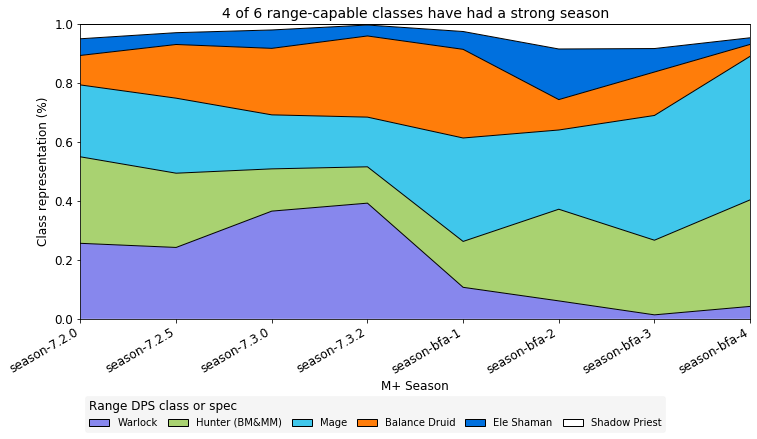

In [539]:
fig = plt.gcf()
fig.set_size_inches(12, 6.5)
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)

clr = blizzcolors.BlizzColors()
plt.stackplot(list(range(len(dpsm))),
              dpsr['dps_warlock'],
              dpsr['dps_hunter'],
              dpsr['dps_mage'],
              dpsr['dps_druid_balance'],
              dpsr['dps_shaman_elemental'],
              dpsr['dps_priest'],
              colors = [clr.get_color('warlock'),
                        clr.get_color('hunter'),
                        clr.get_color('mage'),
                        clr.get_color('druid'),
                        clr.get_color('shaman'),
                        clr.get_color('priest')]
             )

leg = plt.legend(['Warlock', 'Hunter (BM&MM)', 'Mage', 'Balance Druid',
                  'Ele Shaman', 'Shadow Priest'],
    fontsize=10, loc='lower left', title='Range DPS class or spec',
    ncol=6, bbox_to_anchor=(0,-0.4), frameon=True, facecolor='grey',
    framealpha=0.08,
    columnspacing=1)

leg._legend_box.align = 'left'

# edge legend patches (currently not visible)
for lh in leg.legendHandles:
    lh.set_edgecolor('black')

dps_range_mod = [
    'dps_warlock',
    'dps_hunter',
    'dps_mage',
    'dps_druid_balance',
    'dps_shaman_elemental',
    'dps_priest'
    ]
dfx = np.zeros(8)
for i in dps_range_mod:
    dfx = dfx + dpsr[i].to_numpy()
    plt.plot(list(range(len(dpsr))),
              dfx, color='black', lw=1)

plt.xticks(list(range(len(dpsr))),list(dpsr.index), rotation=30,
           horizontalalignment='right')

plt.title('4 of 6 range-capable classes have had a strong season')
plt.ylabel('Class representation (%)')
plt.xlabel('M+ Season')
plt.xlim([0,len(tnk)-1])
plt.ylim([0,1])


plt.gcf().subplots_adjust(bottom=0.25)

plt.savefig('visualization/range_dps_new.jpg', dpi=300)

#### Plot range vs melee ratio

In [578]:
num_melee = gdf[dps_melee].sum(axis=1)
num_range = gdf[dps_range].sum(axis=1)

ratio = num_melee/(num_melee + num_range)
ratio

season
season-7.2.0    0.364671
season-7.2.5    0.353404
season-7.3.0    0.322140
season-7.3.2    0.300275
season-bfa-1    0.601579
season-bfa-2    0.734486
season-bfa-3    0.706791
season-bfa-4    0.608984
dtype: float64

[0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66]

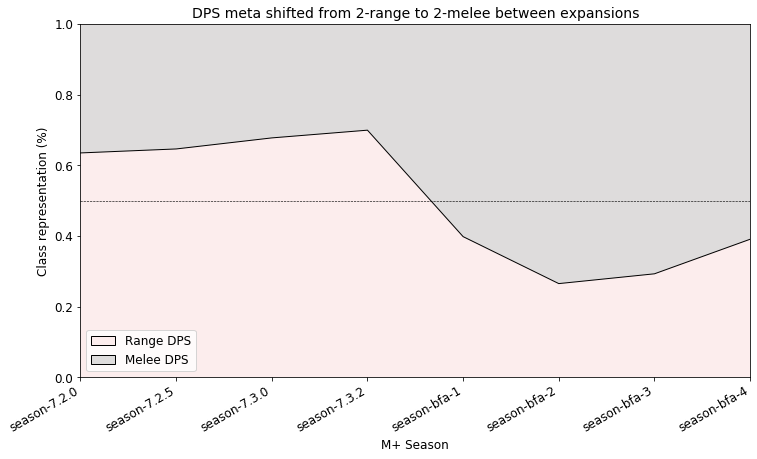

In [577]:
fig = plt.gcf()
fig.set_size_inches(12, 6.5)
plt.rc('font', size=12)
plt.rc('axes', titlesize=14)

plt.stackplot(list(range(len(ratio))),
              [1-ratio, ratio],
              colors=['#fceded', '#dedcdc'])

leg = plt.legend(['Range DPS', 'Melee DPS'], loc='lower left', fontsize=12)

for lh in leg.legendHandles:
    lh.set_edgecolor('black')


plt.plot(list(range(len(ratio))), 1-ratio, color='black', lw=1)
plt.plot([0, 8], [0.5, 0.5], '--', color='black', lw=0.6)

plt.xlim([0,len(ratio)-1])
plt.ylim([0,1])

plt.xticks(list(range(len(ratio))),list(ratio.index), rotation=30,
           horizontalalignment='right')


plt.title('DPS meta shifted from 2-range to 2-melee between expansions')
plt.ylabel('Class representation (%)')
plt.xlabel('M+ Season')


plt.savefig('visualization/melee_vs_range.jpg', dpi=300)